In [1]:
import tprstats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
coffee_data = pd.read_excel('../data/Coffee_Data.xlsx', engine='openpyxl')
model_coffee_ts = tprstats.model(name = "ts", formula='cons~rpcarb+rpcinc+rpcofe', data=coffee_data)



In [3]:
model_log_coffee_ts = tprstats.model(name = "ts", formula='log(cons) ~ log(rpcarb) + log(rpcinc) + log(rpcofe)', data=coffee_data)

In [4]:
plot_3d_example = pd.read_excel('C:/Users/epple/Box/Temporary/Plot_3D_Example.xlsx')



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

def plot_3d_regression(varx, vary, varz, theTheta, thePhi, data):
    x = data[varx]
    y = data[vary]
    z = data[varz]
   
    # Fit a linear regression model
    X = sm.add_constant(pd.DataFrame({varx: x, vary: y}))
    fit = sm.OLS(z, X).fit()
    
    # Create a grid for predictions
    grid_lines = 26
    x_pred = np.linspace(x.min(), x.max(), grid_lines)
    y_pred = np.linspace(y.min(), y.max(), grid_lines)
    x_pred, y_pred = np.meshgrid(x_pred, y_pred)
    xy_pred = pd.DataFrame({varx: x_pred.ravel(), vary: y_pred.ravel()})
    z_pred = fit.predict(sm.add_constant(xy_pred)).values.reshape(grid_lines, grid_lines)
    
    # Create the 3D scatter plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the actual data points
    ax.scatter(x, y, z, color='black', label='Actual',s=10)
    
    # Plot the regression surface
    ax.plot_surface(x_pred, y_pred, z_pred, color='blue', alpha=0.5)
    
    # Add vertical lines from the horizontal plane to the data points
    for i in range(len(x)):
        ax.plot([x[i], x[i]], [y[i], y[i]], [0, z[i]], color='grey', linestyle='--',linewidth=.85)


    
    # Set labels and title
    ax.set_xlabel(varx)
    ax.set_ylabel(vary)
    ax.set_zlabel(varz)
    ax.set_title(f'{varz} as a function of {varx} and {vary}')
    
    # Set the viewing angle
    ax.view_init(elev=thePhi, azim=theTheta)
    
    plt.legend()
    plt.show()

# Example usage:
# Assuming 'data' is a pandas DataFrame with columns 'varx', 'vary', and 'varz'
# plot_3d_regression('varx', 'vary', 'varz', 30, 45, data)

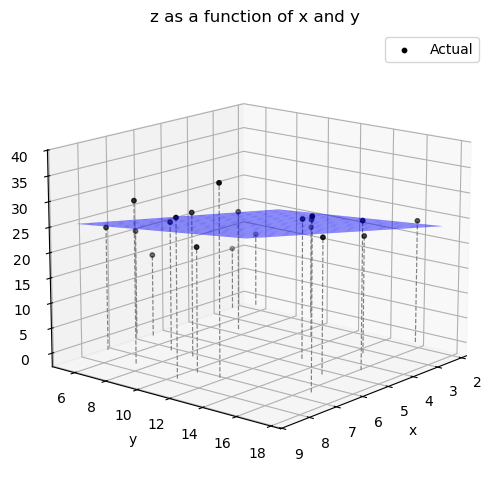

In [6]:
plot_3d_regression('x', 'y', 'z', 40, 15, plot_3d_example)